# US-India YouTube 2021 Trending Video Comparison (Part 1)

## Importing Packages and Configurations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import numpy as np
from collections import Counter
import wordcloud
from PIL import Image
import re

In [2]:
def plot_conf(ax, xlbl='', ylbl='', t='', back_color='#ffffff',
              text_color='#616161', grid_color='#e9e9e9', 
              tick_color='', ticklbl_size=13, lbl_size=13, lang='en'):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor(back_color)
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor=text_color, color=back_color)
    if tick_color != '':
        ax.tick_params(axis='both', color=tick_color)
    ax.tick_params(axis='both', which='major', labelsize=ticklbl_size)
    # adding a grid and specifying its color
    ax.grid(True, color=grid_color)
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color(back_color)
    ax.spines['top'].set_color(back_color) 
    ax.spines['right'].set_color(back_color)
    ax.spines['left'].set_color(back_color)
    # setting the title, x label, and y label of the plot
    if lang == 'ar':
        ax.set_title(get_display(reshaper.reshape(t)), fontweight='bold', family='Amiri',
                     fontsize=14, color=text_color, loc='right', pad=24);
        ax.set_xlabel(get_display(reshaper.reshape(xlbl)), fontweight='bold', family='Amiri',
                      labelpad=16, fontsize=lbl_size, color=text_color, fontstyle='italic');
        ax.set_ylabel(get_display(reshaper.reshape(ylbl)), fontweight='bold', family='Amiri',
                      color=text_color, labelpad=16, fontsize=lbl_size, fontstyle='italic');
    else:
        ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
        ax.set_xlabel(xlbl, labelpad=16, fontsize=lbl_size, color='#616161', fontstyle='italic');
        ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=lbl_size, fontstyle='italic');
        
# Reference: https://ammar-alyousfi.com/2020/youtube-trending-videos-analysis-2019-us#trending-channels

us_col = '#011F5B'

india_col='#990000'

## Reading, Combining and Cleaning Datasets

In [4]:
us=pd.read_csv('US_youtube_trending_data-2.csv')
india=pd.read_csv('IN_youtube_trending_data.csv')

In [6]:
# Extract category and ID from JSON 

import json
a= open('US_category_id.json')
data_us= json.load(a)

b= open('IN_category_id.json')
data_in= json.load(b)

title_us=[]
id_us=[]
for i in range(len(data_us['items'])):
  title_us.append(data_us['items'][i]['snippet']['title'])
  id_us.append(data_us['items'][i]['id'])

title_in=[]
id_in=[]
for i in range(len(data_in['items'])):
  title_in.append(data_in['items'][i]['snippet']['title'])
  id_in.append(data_in['items'][i]['id'])

In [7]:
# Transform category list to df and merge to original dateframe

## Transform category list to df
us_category= {
    'id': id_us,
    'title': title_us}
us_category_df = pd.DataFrame(us_category)

in_category= {
    'id': id_in,
    'title': title_in}
in_category_df = pd.DataFrame(in_category)

## Merge category id and category
us_category_df['id']=pd.to_numeric(us_category_df['id'])
in_category_df['id']=pd.to_numeric(in_category_df['id'])

us_all=pd.merge(us,us_category_df,left_on='categoryId',right_on='id',how='left')
india_all=pd.merge(india,in_category_df,left_on='categoryId',right_on='id',how='left')

In [8]:
# Limit time for 2021 and clean the datasets
us_all['trending_date'] = pd.to_datetime(us_all['trending_date'])
us_all= us_all[(us_all['trending_date'] >= '2021-01-01') & (us_all['trending_date'] <= '2021-12-03')]
us_all.rename(columns={'title_y':'category',
            'title_x':'title'},inplace=True)
us_all.sort_values(by='trending_date', ascending=True, inplace=True)
us_all.reset_index(drop=True, inplace=True)

india_all['trending_date'] = pd.to_datetime(india_all['trending_date'])
india_all= india_all[(india_all['trending_date'] >= '2021-01-01') & (india_all['trending_date'] <= '2021-12-03')]
india_all.rename(columns={'title_y':'category',
            'title_x':'title'},inplace=True)
india_all.sort_values(by='trending_date', ascending=True, inplace=True)
india_all.reset_index(drop=True, inplace=True)

### Unique Trending Videos Dataset Cleaning

In [9]:
## US
# Get Trending days
us_df1=pd.DataFrame(us_all.groupby('title').size().sort_values(ascending=False))

# Get data by unique title
us_df2=us_all.groupby('title').sum().sort_values(by='view_count',ascending=False)

# Merge trending days and unique title
us_df3=pd.merge(
    us_df2,us_df1,left_index=True, right_index=True, how='left'
    ).rename(
    columns={0:'trending_days'}).sort_values(
    by=['view_count','trending_days'],ascending=False)
us_df3=us_df3.reset_index()

# Get unique category
us_all2=us_all[['video_id','title','category','tags','channelTitle']].drop_duplicates(subset='title',keep='first')

# Merge all with unique category
us_df4=pd.merge(us_df3,us_all2,on='title',how='left')[['title',
                                                         'view_count',
                                                         'likes',
                                                         'dislikes',
                                                         'comment_count',
                                                         'trending_days',
                                                         'category',
                                                         'video_id',
                                                         'channelTitle',
                                                         'tags']]
us_df4['response_rate']=(us_df4['comment_count']+us_df4['likes']+us_df4['dislikes'])/us_df4['view_count']
us_df4['response_rate']=us_df4['response_rate'].map("{:.2%}".format)

us_df4.head(50).to_csv('us_df4-top50.csv')
us_df4

,title,view_count,likes,dislikes,comment_count,trending_days,category,video_id,channelTitle,tags,response_rate
0,Turn into orbeez - Tutorial #Shorts,5640301234,189617847,6167736,74974,36,Entertainment,hdmx71UjBXs,Fortnite Fun TV,[None],3.47%
1,Adele - Easy On Me (Official Video),1760774068,70482598,790723,3821932,18,Music,U3ASj1L6_sY,AdeleVEVO,There ain’t no gold|In this river|That I’ve be...,4.26%
2,SPIDER-MAN: NO WAY HOME - Official Teaser Trai...,1471277143,63080849,430664,3818828,24,Entertainment,rt-2cxAiPJk,Sony Pictures Entertainment,spiderman|spiderman no way home|spider-man|spi...,4.58%
3,My hidden talent #shorts,1452140141,47131264,944115,82208,20,Comedy,O2W2gUXAt78,Zach King Shorts,shorts|#shorts|zach king|magic|tiktok|dance|fe...,3.32%
4,"India claim stunning series win, end Australia...",1201206446,26718566,831123,1737039,34,Sports,wY6UyatwVTA,cricket.com.au,Australia|India|day five|fourth Test|Gabba|hig...,2.44%
...,...,...,...,...,...,...,...,...,...,...,...
12307,Gay And Not Proud - Daniel Howell | YouTube Pr...,0,0,0,6784,5,Entertainment,ifJYb2An7wE,Daniel Howell,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,inf%
12308,Introducing the shorter side of YouTube,0,85591,6380,0,4,Education,Hb3rmh-_FMw,YouTube,[None],inf%
12309,Demi Lovato performs their greatest hits this ...,0,0,0,564,4,Entertainment,kmk5vciFbek,Demi Lovato,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,inf%
12310,The Funeral of The Duke of Edinburgh,0,0,0,0,1,People & Blogs,mCY4b6GGkb4,The Royal Family,[None],nan%


In [10]:
## India
# Get Trending days
india_df1=pd.DataFrame(india_all.groupby('title').size().sort_values(ascending=False))

# Get data by unique title
india_df2=india_all.groupby('title').sum().sort_values(by='view_count',ascending=False)

# Merge trending days and unique title
india_df3=pd.merge(
    india_df2,india_df1,left_index=True, right_index=True, how='left'
    ).rename(
    columns={0:'trending_days'}).sort_values(
    by=['view_count','trending_days'],ascending=False)
india_df3=india_df3.reset_index()

# Get unique category
india_all2=india_all[['video_id','title','category','tags','channelTitle']].drop_duplicates(subset='title',keep='first')

# Merge all with unique category
india_df4=pd.merge(india_df3,india_all2,on='title',how='left')[['title',
                                                         'view_count',
                                                         'likes',
                                                         'dislikes',
                                                         'comment_count',
                                                         'trending_days',
                                                         'category',
                                                         'video_id',
                                                         'channelTitle',
                                                         'tags']].rename(columns={'title_y':'category'})
india_df4['response_rate']=(india_df4['comment_count']+india_df4['likes']+india_df4['dislikes'])/india_df4['view_count']
india_df4['response_rate']=india_df4['response_rate'].map("{:.2%}".format)
india_df4.head(50).to_csv('india_df4-top50.csv')
india_df4

,title,view_count,likes,dislikes,comment_count,trending_days,category,video_id,channelTitle,tags,response_rate
0,KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...,1495945829,75880519,609054,6523778,15,Entertainment,Qah9sSIXJqk,Hombale Films,Hombale films|hombale|hombale films kannada|ho...,5.55%
1,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...,1366495429,32956354,823894,2988894,10,Music,DUwlGduupRI,DM - Desi Melodies,filhall 2|Filhaal 2|Filhaal|mohabbat|Mohabbat ...,2.69%
2,Paytm IPL 2021 Ad - The Salon (English),1327627464,16690,16642,5682,10,People & Blogs,QyEiXDIcWrA,Paytm,[None],0.00%
3,BTS (방탄소년단) 'Permission to Dance' Official MV,1080130335,94008261,614627,23039574,9,Music,CuklIb9d3fI,HYBE LABELS,HYBE|HYBE LABELS|하이브|하이브레이블즈,10.89%
4,Turn into egg - Tutorial #Shorts,961205962,31703110,1017264,20338,13,Entertainment,ggJoXFNkRUw,Fortnite Fun TV,[None],3.41%
...,...,...,...,...,...,...,...,...,...,...,...
19153,#Shorts Baras Baras B Praak,24455,2683,33,201,1,Music,bO_NWnup5iw,B Praak,[None],11.93%
19154,Vishwakarma Puja Song| अगर विश्व में विश्वकर्म...,24052,815,19,45,1,Music,_9MEthDPJmg,Yuki Music,yuki music|vishwakarma bhajan|poonam vishwakar...,3.65%
19155,नवरात्रि के छठे दिन की कात्यायनी माता की कथा |...,22819,426,25,37,1,Music,l8XSH2Llkn4,Shree Jee - Bhakti,नवरात्रि के छठे दिन की कात्यायनी माता की कथा |...,2.14%
19156,Earth Day 2021 Doodle,0,0,0,0,7,Film & Animation,hAxqygRdM4g,GoogleDoodles,[None],nan%


## Sub-task 1: What is the distribution of trending video categories and channels in the US? What are the top 5 categories and top 10 channels? 

### Category

In [11]:
# top 5 gategories in US 
us_category_count = pd.DataFrame(us_df4.groupby('category').size().sort_values(ascending=False))
us_category_count.reset_index(inplace=True)
us_category_count['percentage'] = (us_category_count[0]/us_category_count[0].sum())*100
us_category_count
# top 5: Entertainment; Gaming; Music; Sports; People & Blogs

,category,0,percentage
0,Gaming,2534,20.581546
1,Entertainment,2469,20.053606
2,Music,1932,15.692008
3,Sports,1407,11.427875
4,People & Blogs,1102,8.950617
5,Comedy,642,5.214425
6,News & Politics,468,3.801170
7,Film & Animation,446,3.622482
8,Science & Technology,384,3.118908
9,Howto & Style,315,2.558480


In [12]:
# US percantage of top 5 gategories
sum_us=0
for i in range(5):
  sum_us+=us_category_count.at[i,'percentage']
print(sum_us)

76.7056530214425


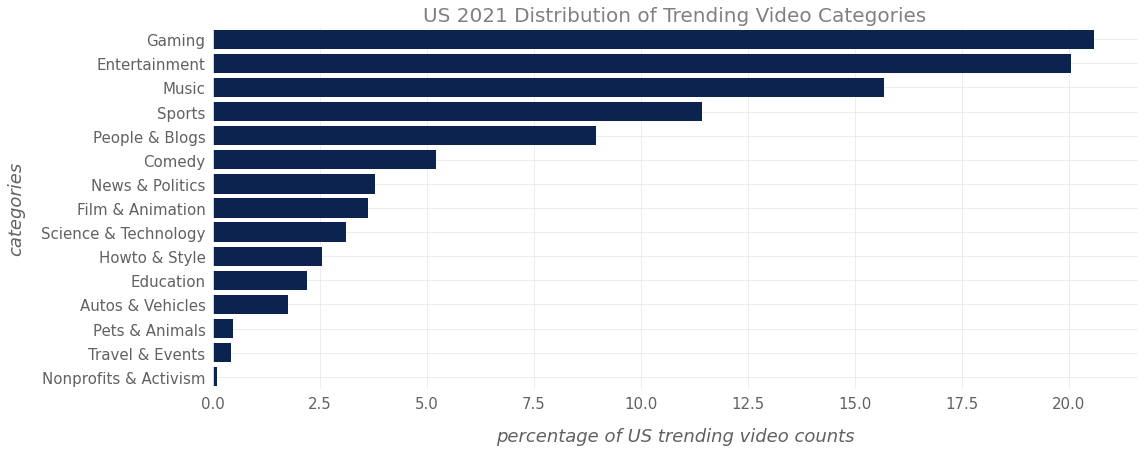

In [46]:
# US 2021 Percentage Distribution of Trending Video Categories
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x='percentage', y="category", data=us_category_count,color=us_col, ax=ax);
plot_conf(ax, xlbl='percentage of US trending video counts', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('US 2021 Distribution of Trending Video Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
plt.subplots_adjust(top=0.85)
plt.savefig('graph/data1.png',dpi=300)

### Channel

[None, None]

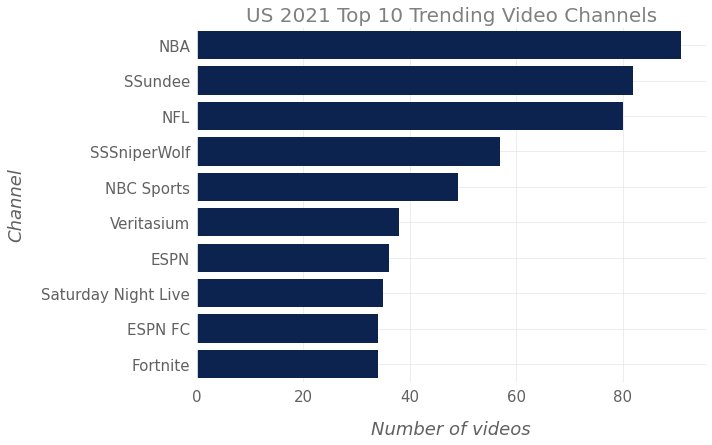

In [15]:
# US top 10 channels
channels_us= us_df4.groupby('channelTitle').size().sort_values(ascending=False).reset_index(name='video_count').head(10)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="video_count", y="channelTitle", data=channels_us, color=us_col, ax=ax);
plot_conf(ax, xlbl='Number of videos', ylbl='Channel', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('US 2021 Top 10 Trending Video Channels',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 


In [16]:
# number of trending channels in top 5 categories US
dic_us={}
for i in ['Entertainment','Music','Sports','Gaming','People & Blogs']:
  dic_us[i]=len(us_df4[us_df4['category']==i].groupby('channelTitle'))
dic_us_df= pd.DataFrame.from_dict(dic_us,orient='index',columns=['number of channels']).reset_index().rename(columns={'index':'category'}).sort_values('number of channels',ascending=False)
dic_us_df

,category,number of channels
3,Gaming,800
0,Entertainment,769
1,Music,732
4,People & Blogs,443
2,Sports,294


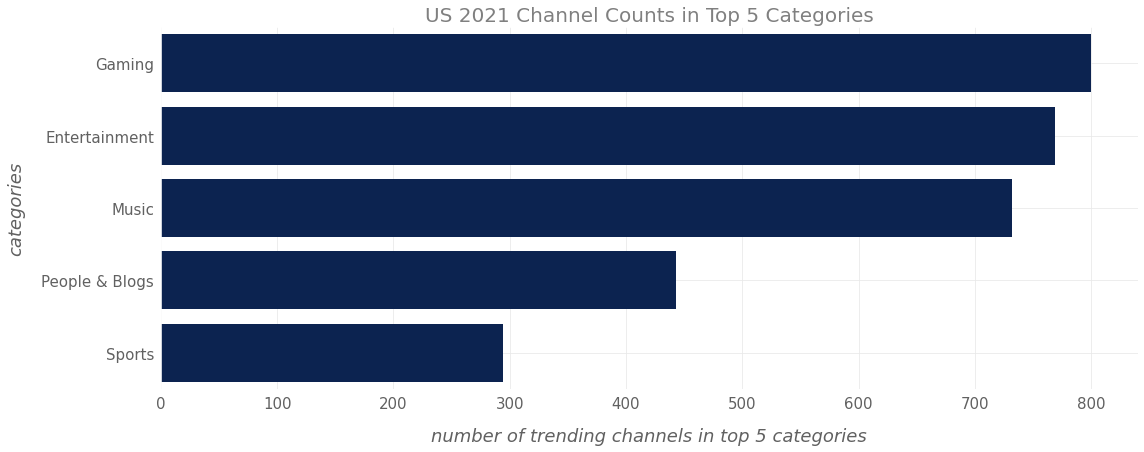

In [51]:
# US 2021 Channel Counts in Top 5 Categories
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x='number of channels', y="category", data=dic_us_df,color=us_col, ax=ax);
plot_conf(ax, xlbl='number of trending channels in top 5 categories', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('US 2021 Channel Counts in Top 5 Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
plt.subplots_adjust(top=0.85)
plt.savefig('graph/data2.png',dpi=300)

## Sub-task 2: What is the distribution of trending video categories and channels in India? What are the top 5 categories and top 10 channels? How are they different from those in the US?

### Category

In [18]:
# top 5 gategories in India 
in_category_count = pd.DataFrame(india_df4.groupby('category').size().sort_values(ascending=False))
in_category_count.reset_index(inplace=True)
in_category_count['percentage'] = (in_category_count[0]/in_category_count[0].sum())*100
in_category_count
# top 5: Entertainment; People & Blogs; Music; Comedy; Gaming

,category,0,percentage
0,Entertainment,8328,43.485980
1,People & Blogs,2542,13.273458
2,Music,2345,12.244791
3,Comedy,1158,6.046682
4,Gaming,901,4.704715
5,Science & Technology,741,3.869250
6,Sports,707,3.691713
7,News & Politics,674,3.519398
8,Howto & Style,590,3.080779
9,Education,560,2.924129


In [19]:
# percantage of top 5 gategories
sum_in=0
for i in range(5):
  sum_in+=in_category_count.at[i,'percentage']
print(sum_in)

79.75562633805023


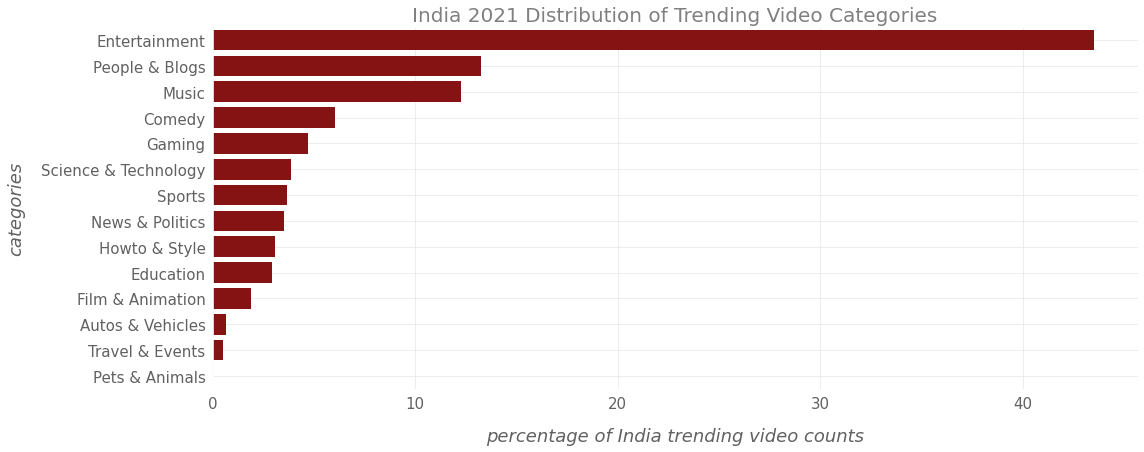

In [45]:
# India 2021 Percentage Distribution of Trending Video Categories
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x='percentage', y="category", data=in_category_count,color=india_col, ax=ax);
plot_conf(ax, xlbl='percentage of India trending video counts', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('India 2021 Distribution of Trending Video Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
plt.subplots_adjust(top=0.85)
plt.savefig('graph/data3.png',dpi=300)

### Channel

[None, None]

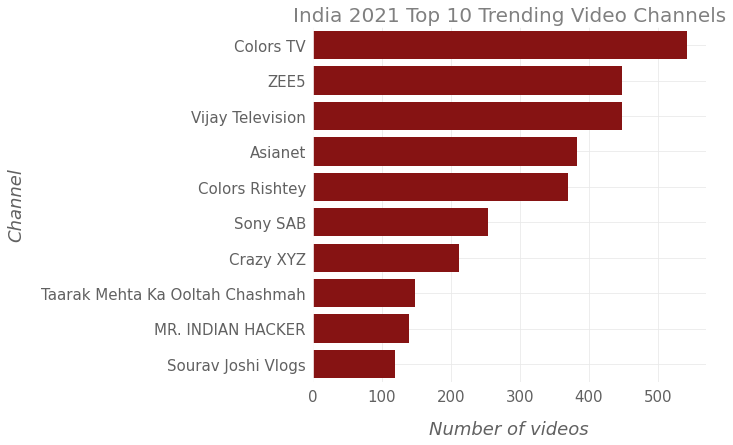

In [21]:
# India top 10 channels
channels_in= india_df4.groupby('channelTitle').size().sort_values(ascending=False).reset_index(name='video_count').head(10)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="video_count", y="channelTitle", data=channels_in,color=india_col, ax=ax);
plot_conf(ax, xlbl='Number of videos', ylbl='Channel', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('India 2021 Top 10 Trending Video Channels',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

In [22]:
# number of trending channels in top 5 categories India
dic_in={}
for i in ['Entertainment','Music','Comedy','Gaming','People & Blogs']:
  dic_in[i]=len(india_df4[india_df4['category']==i].groupby('channelTitle'))
dic_in_df= pd.DataFrame.from_dict(dic_in,orient='index',columns=['number of channels']).reset_index().rename(columns={'index':'category'}).sort_values('number of channels',ascending=False)
dic_in_df

,category,number of channels
0,Entertainment,820
4,People & Blogs,503
1,Music,424
2,Comedy,176
3,Gaming,140


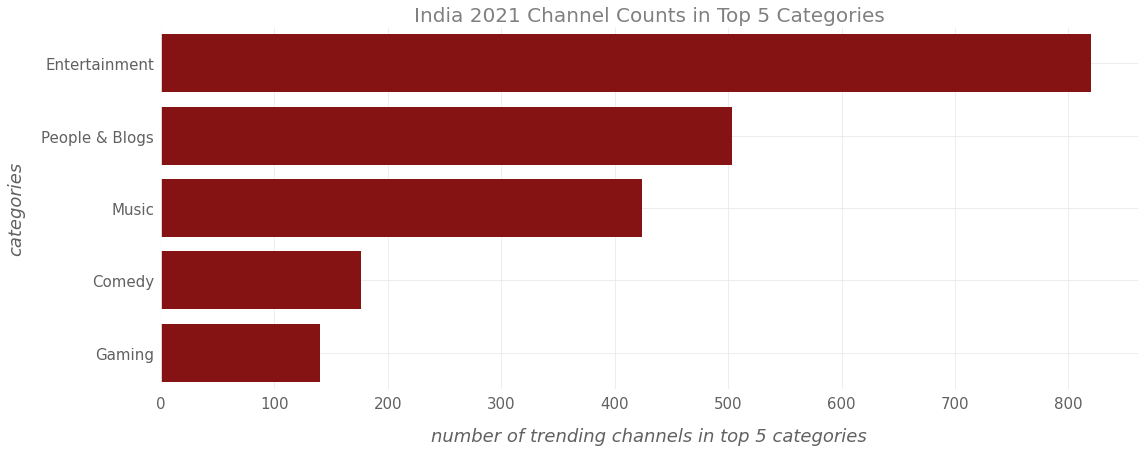

In [47]:
# India 2021 Channel Counts in Top 5 Categories
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x='number of channels', y="category", data=dic_in_df,color=india_col, ax=ax);
plot_conf(ax, xlbl='number of trending channels in top 5 categories', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('India 2021 Channel Counts in Top 5 Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
plt.subplots_adjust(top=0.85)
plt.savefig('graph/data4.png',dpi=300)

## Sub-task 3: Among trending videos in the US, what are the distributions and characteristics of top 30 most viewed videos ? How are the likes and comment counts distributed? What are the response rate of those videos ?

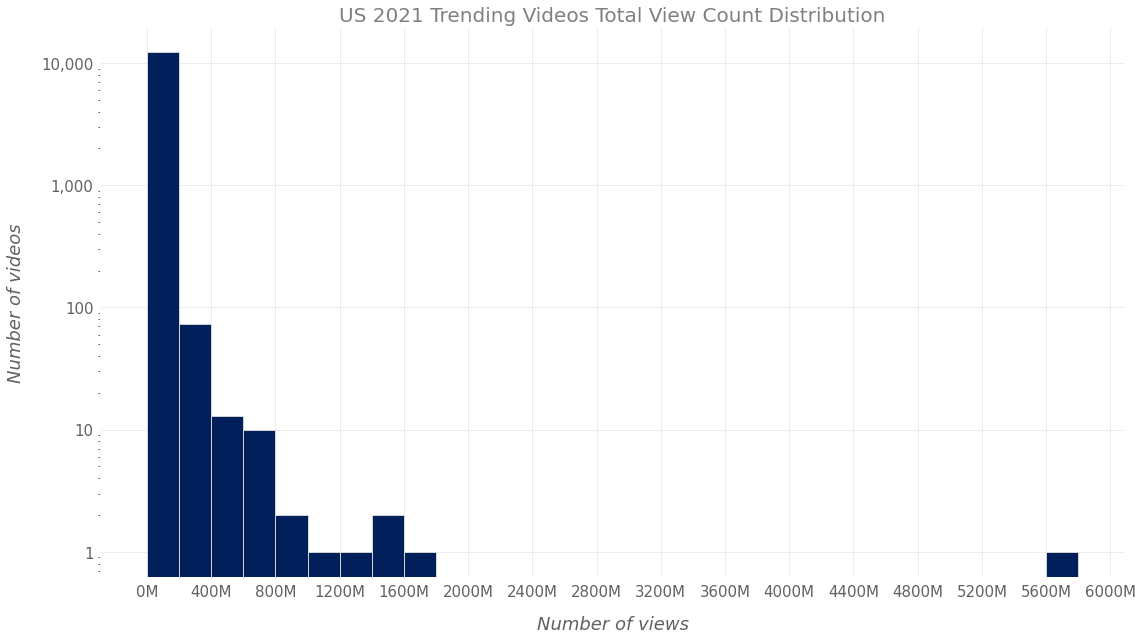

In [67]:
# plot view count 
ax = us_df4['view_count'].plot(kind='hist',bins=np.arange(0, 60e8, 2e8)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=us_col);
plot_conf(ax, xlbl='Number of views', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('US 2021 Trending Videos Total View Count Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(400000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('us_view.png',dpi=300)

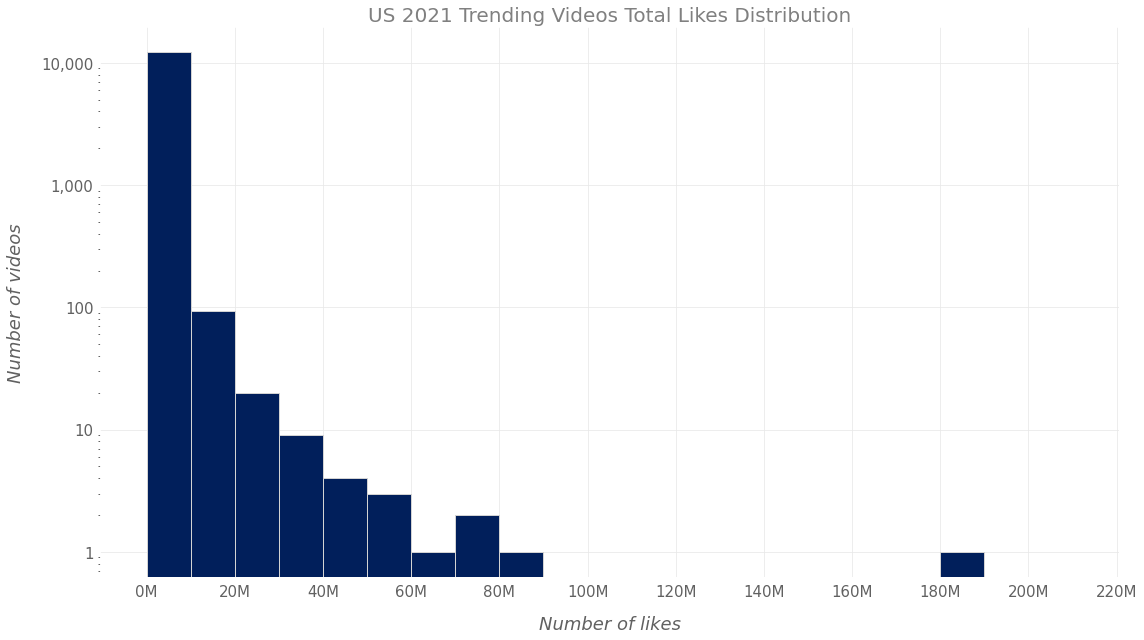

In [68]:
# plot likes count 
ax = us_df4['likes'].plot(kind='hist', bins=np.arange(0, 220e6, 10e6)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=us_col);
plot_conf(ax, xlbl='Number of likes', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('US 2021 Trending Videos Total Likes Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('us_likes.png',dpi=300)

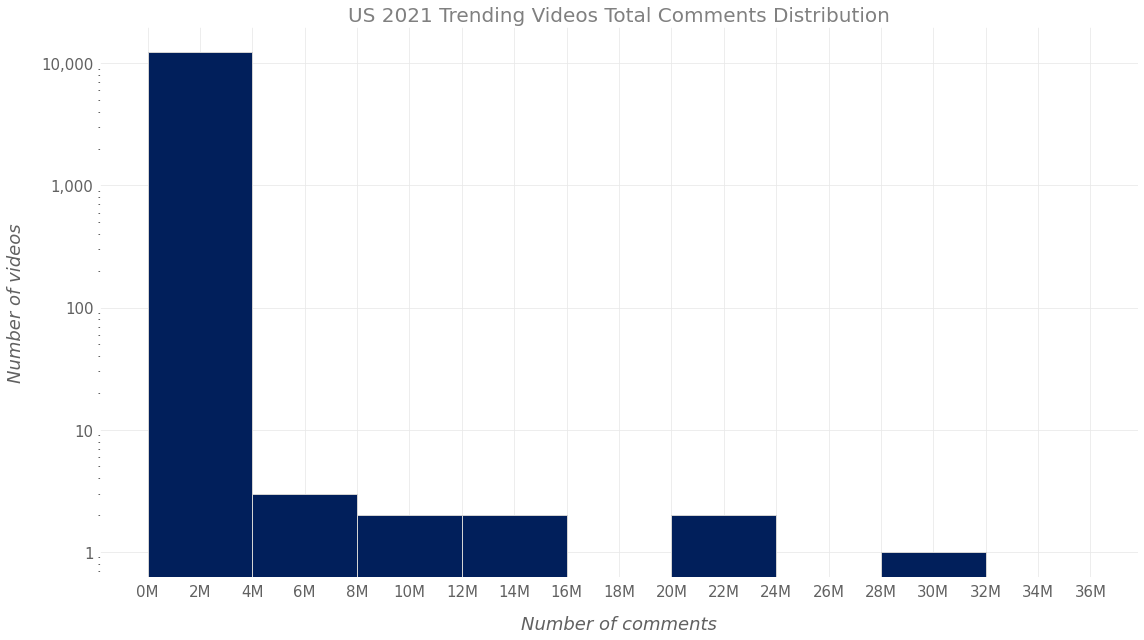

In [69]:
# plot comment count 
ax = us_df4['comment_count'].plot(kind='hist', bins=np.arange(0, 40e6, 4e6)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=us_col);
plot_conf(ax, xlbl='Number of comments', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('US 2021 Trending Videos Total Comments Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('US_comments.png',dpi=300)

## Sub task 4 : Compared to trending videos in the US, what are the characteristics of top 30 most viewed videos in India? How are the likes and comment counts distributed? What is the response rate of those videos?

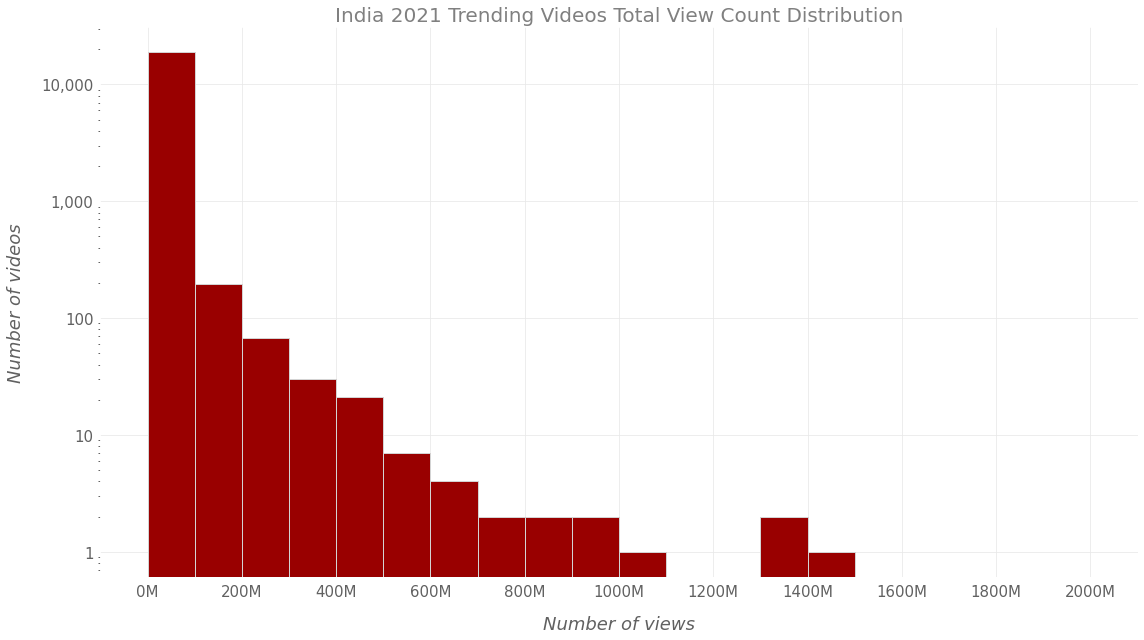

In [70]:
# plot view count 
ax = india_df4['view_count'].plot(kind='hist',bins=np.arange(0, 21e8, 1e8)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=india_col);
plot_conf(ax, xlbl='Number of views', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('India 2021 Trending Videos Total View Count Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(200000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('india_views.png',dpi=300)

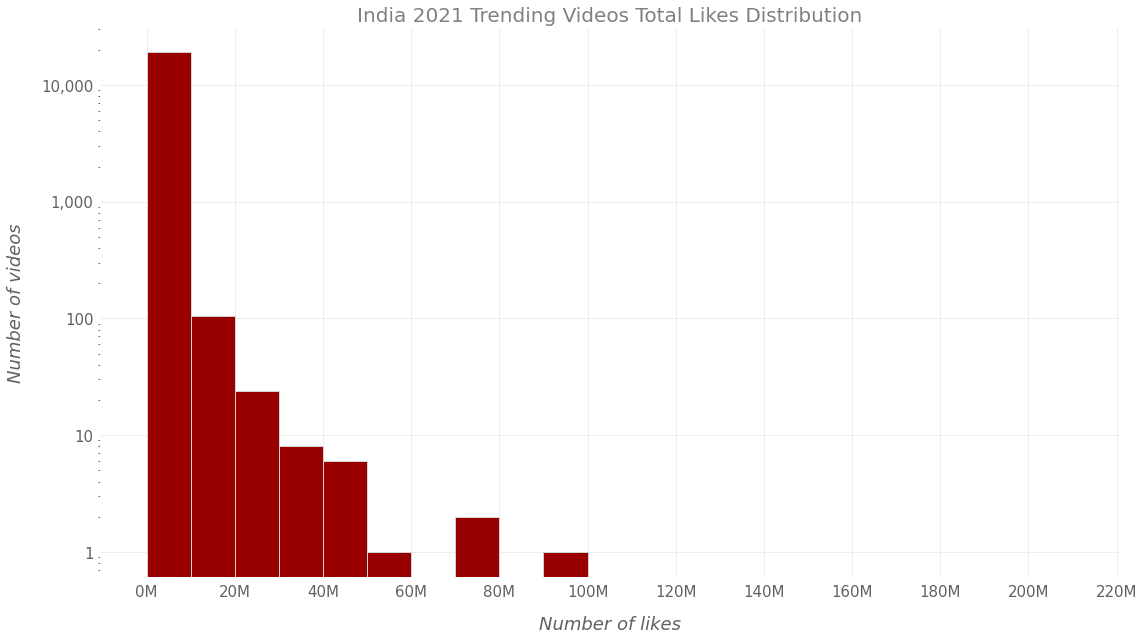

In [71]:
# plot like count 
ax = india_df4['likes'].plot(kind='hist', bins=np.arange(0, 220e6, 10e6)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=india_col);
plot_conf(ax, xlbl='Number of likes', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('India 2021 Trending Videos Total Likes Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('india_likes.png',dpi=300)

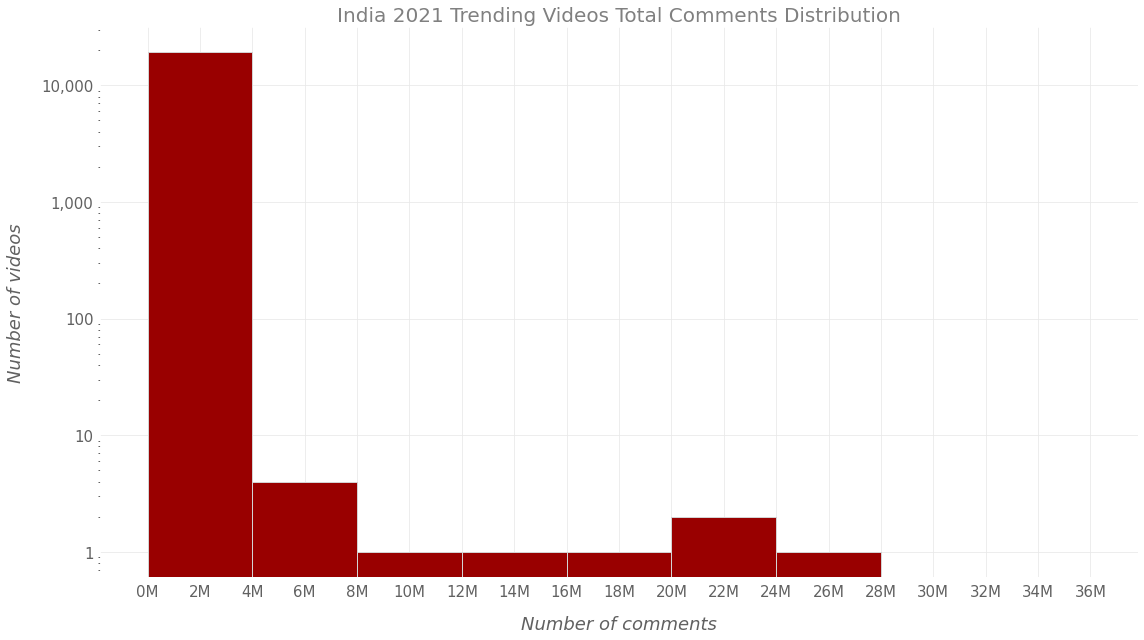

In [72]:
# plot comment count 
ax = india_df4['comment_count'].plot(kind='hist', bins=np.arange(0, 40e6, 4e6)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=india_col);
plot_conf(ax, xlbl='Number of comments', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('India 2021 Trending Videos Total Comments Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('india_comments.png',dpi=300)

## Sub-Task 5:What are the most common words in trending videos’ tags in 2021 in the US and India respectively?

### US

In [73]:
# spilt tags with |
us_tag=us_df4['tags'].apply(lambda x : x.split('|'))

# extract tags and tags counts for lists
tag_dict={}

for x in us_tag:
    for i in x:
        if i in tag_dict:
            tag_dict[i]+=1
        else:
            tag_dict[i]=1

# delet none tags
tag_dict.pop('[None]')

# store and sort tags
sort_dict2=sorted(tag_dict.items(), key = lambda i: i[1],reverse=True)
sort_dict2

[('funny', 783),
 ('minecraft', 553),
 ('comedy', 496),
 ('challenge', 366),
 ('vlog', 260),
 ('gaming', 246),
 ('news', 239),
 ('rap', 197),
 ('highlights', 196),
 ('fortnite', 192),
 ('animation', 191),
 ('how to', 189),
 ('music', 189),
 ('football', 188),
 ('2021', 187),
 ('family friendly', 181),
 ('tiktok', 177),
 ('Minecraft', 175),
 ('video', 173),
 ('sports', 172),
 ('new', 172),
 ('reaction', 169),
 ('game', 158),
 ('family', 156),
 ('NBA', 156),
 ('hip hop', 154),
 ('fun', 145),
 ('minecraft challenge', 141),
 ('dream', 129),
 ('shorts', 128),
 ('Rap', 128),
 ('trailer', 123),
 ('gameplay', 122),
 ('science', 121),
 ('soccer', 121),
 ('Football', 119),
 ('minecraft but', 113),
 ('Records', 112),
 ('diy', 110),
 ('interview', 109),
 ('live', 108),
 ('mine craft', 108),
 ('Basketball', 108),
 ('Hip Hop', 106),
 ('tutorial', 106),
 ('review', 102),
 ('nba', 102),
 ('marvel', 100),
 ('fortnite battle royale', 100),
 ('parody', 95),
 ('yt:cc=on', 94),
 ('espn', 94),
 ('prank', 92

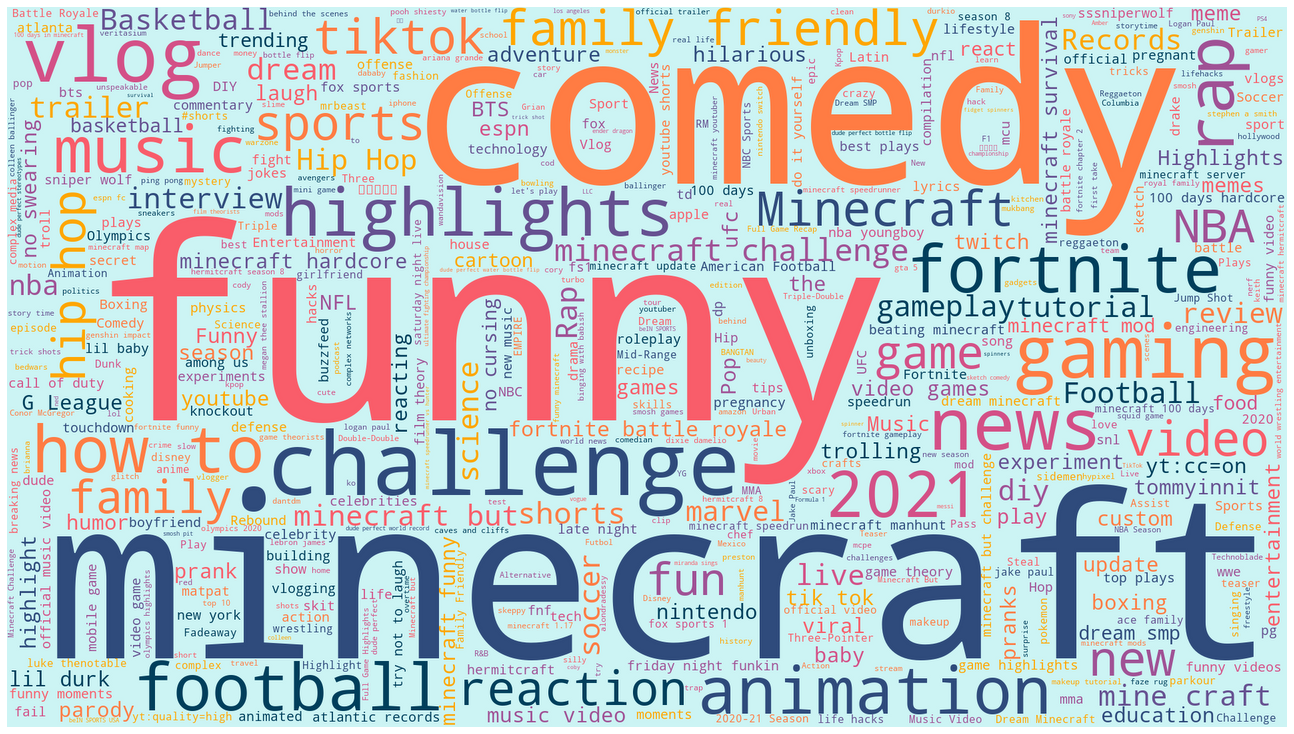

In [74]:
# Plot Wordcloud
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
    return colors[len(word)%len(colors)]

WC_MAX_FZ = 400 
WC_RS = 0.5

wc = wordcloud.WordCloud(width=1920, height=1080, collocations=False,
                         background_color="#CCF4F4", color_func=col_func, 
                         max_words=500, max_font_size=WC_MAX_FZ, 
                         relative_scaling=WC_RS,random_state=10
                        ).generate_from_frequencies(tag_dict)

fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='lanczos')
ax.axis("off")
plt.tight_layout(pad=0)
plt.savefig('US_tages.png',dpi=300)

### India

In [75]:
# extract tags and tags counts for lists
india_tag=india_df4['tags'].apply(lambda x : x.split('|'))
india_tag_dict={}

for x in india_tag:
    for i in x:
        if i in india_tag_dict:
            india_tag_dict[i]+=1
        else:
            india_tag_dict[i]=1
india_tag_dict.pop('[None]')

# sort tags
sort_dict1=sorted(india_tag_dict.items(), key = lambda i: i[1],reverse=True)
sort_dict1

[('comedy', 880),
 ('comedy show', 739),
 ('bigg boss', 577),
 ('hindi shows', 548),
 ('trending', 530),
 ('funny', 512),
 ('crime show', 503),
 ('colors tv new serial', 502),
 ('colors tv promo', 501),
 ('colors tv serials all', 496),
 ('colors tv khatron ke khiladi', 496),
 ('कलर्स टीवी', 496),
 ('horror show', 496),
 ('colors tv naagin', 460),
 ('entertainment', 455),
 ('jethalal', 441),
 ('தமிழ்', 441),
 ('தொலைக்காட்சி', 438),
 ('Star Vijay TV', 438),
 ('Vijay TV', 438),
 ('Tamil TV', 437),
 ('Tamil Shows', 430),
 ('vlog', 427),
 ('तारक मेहता', 402),
 ('reality show', 400),
 ('Star', 397),
 ('hindi comedy show', 389),
 ('tapu sena', 357),
 ('Vijay', 353),
 ('shakti', 353),
 ('விஜய்', 351),
 ('டிவி', 351),
 ('Redefining Entertainment', 350),
 ('voot', 338),
 ('sab tv funny show', 335),
 ('babita', 324),
 ('sab tv channel', 318),
 ('love', 301),
 ('2021', 296),
 ('shorts', 294),
 ('vlogs', 289),
 ('funny video', 281),
 ('swaragini', 279),
 ('hotstar', 278),
 ('zee5', 277),
 ('comedy 

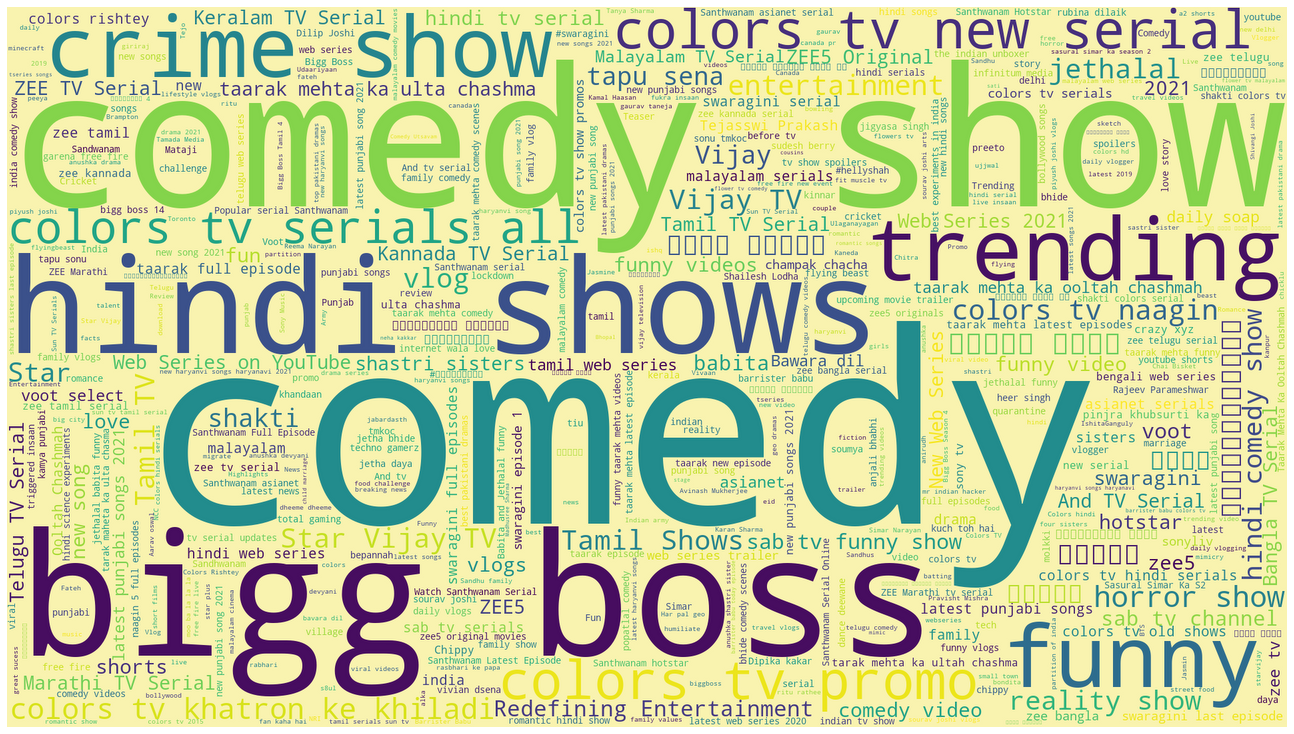

In [76]:
# Plot Wordcloud
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
    return colors[len(word)%len(colors)]

WC_MAX_FZ = 400 
WC_RS = 0.5

wc = wordcloud.WordCloud(width=1920, height=1080, collocations=False,
                         background_color="#F9F3AF", 
                         max_words=500, max_font_size=WC_MAX_FZ, 
                         relative_scaling=WC_RS,random_state=10
                        ).generate_from_frequencies(india_tag_dict)

fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='lanczos')
ax.axis("off")
plt.tight_layout(pad=0)
plt.savefig('India_tags.png',dpi=300)

## Sub-Task 6: If we want to create a new channel, how should we design it to boost popularity on YouTube. How we will do it differently in the US and India?

### Title length 

/Users/angel_zhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None]

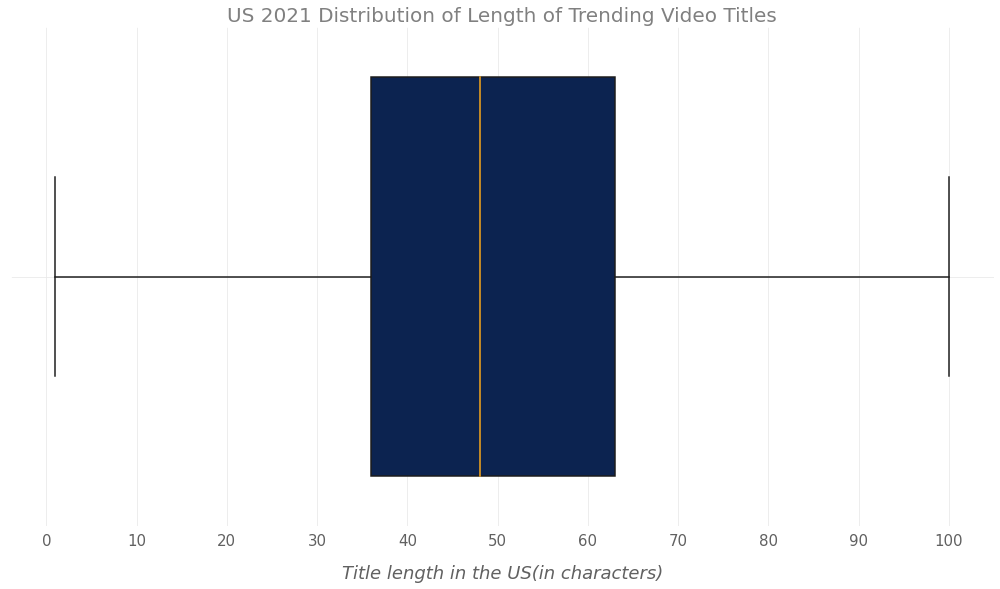

In [79]:
# US title length 
title_lengths = us_df4["title"].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(title_lengths, color=us_col, medianprops={'color': '#FBA91A'}, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plot_conf(ax, xlbl='Title length in the US(in characters)', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('US 2021 Distribution of Length of Trending Video Titles',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

/Users/angel_zhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None]

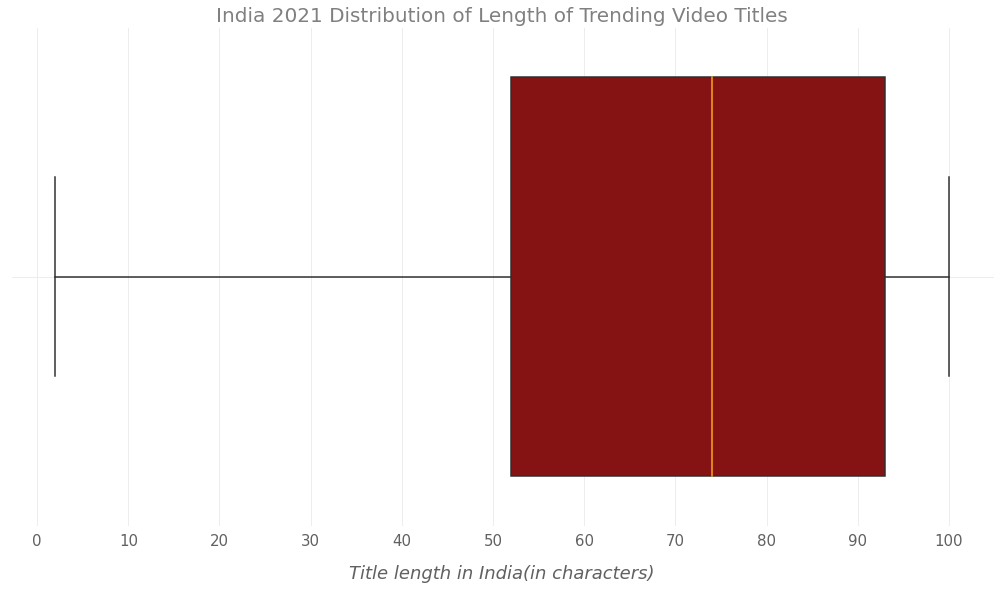

In [84]:
# India title length 
title_lengths = india_df4["title"].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(title_lengths, color=india_col, medianprops={'color': '#FBA91A'}, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plot_conf(ax, xlbl='Title length in India(in characters)', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('India 2021 Distribution of Length of Trending Video Titles',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

### Titles 

In [81]:
# US Title symbol 
all_titles_us = ' '.join([x.lower() for x in us_df4['title']])
title_symbols_us = re.sub(r'\w', '', all_titles_us)
title_symbols_us = re.sub(r'\s', '', title_symbols_us)
title_symbols_us = list(title_symbols_us)
Counter(title_symbols_us).most_common(10)

[('.', 3928),
 ('-', 3750),
 ('|', 3367),
 ('(', 2809),
 (')', 2806),
 ('!', 2746),
 ("'", 1968),
 (',', 1659),
 (':', 1317),
 ('#', 893)]

In [85]:
# India Title symbol 
all_titles_in = ' '.join([x.lower() for x in india_df4['title']])
title_symbols_in = re.sub(r'\w', '', all_titles_in)
title_symbols_in = re.sub(r'\s', '', title_symbols_in)
title_symbols_in = list(title_symbols_in)
Counter(title_symbols_in).most_common(10)

[('|', 35255),
 ('ा', 8353),
 ('്', 7994),
 ('-', 7153),
 ('ി', 4095),
 ('े', 3948),
 ('.', 3675),
 ('#', 3656),
 ('्', 3296),
 ('ी', 3198)]

### Tags 

In [83]:
# US tags
us_tag=us_df4['tags'].apply(lambda x : x.split('|'))

us_tag_dict={}

for x in us_tag:
    for i in x:
        if i in us_tag_dict:
            us_tag_dict[i]+=1
        else:
            us_tag_dict[i]=1

tag_df_us = pd.DataFrame.from_dict(us_tag_dict, orient='index',columns=['counts'])
tag_df_us = tag_df_us.reset_index().rename(columns = {'index':'tag'})
tag_df_us.sort_values('counts',ascending=False,inplace=True)
tag_df_us.to_csv('tagcounts_us.csv')
tag_df_us

,tag,counts
0,[None],2070
345,funny,783
898,minecraft,553
862,comedy,496
866,challenge,366
...,...,...
43312,rick justin roiland,1
43313,morty maurice lamarche,1
43314,adult swim hbo max,1
43315,Dobre Brothers,1


In [87]:
# India tags
in_tag=india_df4['tags'].apply(lambda x : x.split('|'))

in_tag_dict={}

for x in in_tag:
    for i in x:
        if i in in_tag_dict:
            in_tag_dict[i]+=1
        else:
            in_tag_dict[i]=1
            
tag_df_in = pd.DataFrame.from_dict(in_tag_dict, orient='index',columns=['counts'])
tag_df_in = tag_df_in.reset_index().rename(columns = {'index':'tag'})
tag_df_in.sort_values('counts',ascending=False,inplace=True)
tag_df_in.to_csv('tagcounts_in.csv')
tag_df_in

,tag,counts
58,[None],2584
356,comedy,880
9253,comedy show,739
5112,bigg boss,577
5079,hindi shows,548
...,...,...
49684,business idea,1
49683,how to sell,1
49682,red bull,1
49681,roja episode 4th may 21,1
